# From Nonparametrics to Machine Learning




Machine learning has quickly grown into a big field, with applications from
scientific research to daily life.
An authoritative reference is @friedman2001elements,
written at the entry-year postgraduate level.
The ideas in machine learning are general and applicable to economic investigation.
@athey2018impact discusses the impact of machine learning techniques
to economic analysis.
@mullainathan2017machine survey a few new commonly used methods and
demonstrate them in a real example.
@taddy2018technological introduces new technology *artificial intelligence*
and the implication of the underlying economic modeling.


The two broad classes of machine learning methods are *supervised learning* and *unsupervised learning*.
Roughly speaking, the former is about the connection between $X$ and $Y$, while the latter
is only about $X$. Instances of the former are various regression
and classification methods; those of the latter are density estimation,
principal component analysis, and clustering.
These examples are all familiar econometric problems.

From an econometrician's view, supervised machine learning is a set of data fitting procedures that focus on out-of-sample prediction.
The simplest illustration is in the regression context.
We repeat a scientific experiment for $n$ times, and we harvest a dataset $(y_i, x_i)_{i=1}^n$.
What would be the best way to predict $y_{n+1}$ from the same experiment if we know $x_{n+1}$?

Machine learning is a paradigm shift against conventional statistics.
When a statistician propose a new estimator, the standard practice is to pursue
three desirable properties one after another.
We first establish its consistency, which is seen as the bottom line.
Given consistency, we want to show its asymptotic distribution. Ideally, the asymptotic
distribution is normal. Asymptotic normality is desirable as it holds for many regular estimators
and the inferential procedure is familiar to applied researchers.
Furthermore, for an asymptotically normal estimator, we want to
show efficiency, an optimality property. An efficient estimator achieves the smallest asymptotic variance
in a class of asymptotically normal estimators.

In addition, econometrician also cares about
model identification and economic interpretation of the empirical results.
Econometrics workflow interacts the data at hand and the model of interest. At the population level,
we think about the problem of identification. Once the parameter of interest is identified,
then we can proceed to parameter estimation and inference.
Finally, we interpret the results and hopefully they shed light on economics.

<!-- \begin{figure} -->
<!-- \centering -->
<!-- \begin{tikzpicture}[node distance=5mm] -->
<!--     %\draw[help lines] (0,0) grid (9,7); -->

<!-- % Nodes -->
<!--     \node [draw, ellipse] (a) at (2,6) {Model}; -->
<!--     \node [draw, ellipse] (b) at (8,6) {abstract data}; -->
<!--     \node [color=black!40](c) at (1,5) {Population}; -->
<!--     \node (d) at (5,4) {Estimation}; -->
<!--     \node [color=black!40](e) at (1,2) {Sample}; -->
<!--     \node (f) at (5,2) {Inference}; -->
<!--     \node (g) at (5,0) {Interpretation}; -->
<!--     \node [color=black!40](h) at (1,0) {Economics}; -->

<!-- % Arrows   -->
<!--     \draw[-latex] (a) to[bend right=10] node[above, yshift=2mm] {Identification}  (b); -->
<!--     \draw[-latex] (b) to[bend right=10]  (a); -->
<!--     \draw[-latex] (a) to[bend left=0]  (d); -->
<!--     \draw[-latex] (b) to[bend right=0]  (d); -->
<!--     \draw[-latex] (d) to[bend right=0]  (f); -->
<!--     \draw[-latex] (f) to[bend right=0]  (g); -->

<!-- % Lines -->
<!--     \draw[color=black!40,very thick] (0,1) -- (2,1); -->
<!--     \draw[color=black!40,very thick] (0,4) -- (2,4); -->
<!-- \end{tikzpicture} -->
<!-- \caption{Econometrics workflow} -->
<!-- \end{figure} -->

Machine learning deviates from such routines.
First, they argue efficiency is not crucial because the dataset itself is big enough so that the variance is usually small.
Second, in many situations statistical inference is not the goal, so
inferential procedure is not of interest. For example, the recommendation system on Amazon or Taobao has
a machine learning algorithm behind it. There we care about the prediction accuracy, not the causal link
why a consumer interested in one good is likely to purchase another good. Third, the world is so complex
that we have little idea about how the data is generated. We do not have to assume a data generating process (DGP).
If there is no DGP, we lose the standing ground to talk about consistency. Where would my estimator converge
to if there is no "true parameter"? With these arguments, the paradigm of conventional statistics is
smashed. In the context of econometrics,
such argument completely rejects the structural modeling tradition (the Cowles approach).

Readers interested in the debate are referred to @breiman2001statistical.
In this lecture, we put aside the ongoing philosophical debate. Instead,  we study
the most popular machine learning methods that have found growing popularity in economics.


## Nonparametric Estimation

*Parametric* is referred to problems with a finite number of parameters,
whereas *nonparametric* is associated with an infinite number of parameters.
Nonparametric estimation is nothing new to statisticians. However, some ideas
in this old topic is directly related to the underlying principles of machine learning methods.

Consider the density estimation given a sample $(x_1,\ldots,x_n)$. If we assume that
the sample is drawn from a parametric family, for example the normal distribution, then we can use the
maximum likelihood estimation to learn the mean and the variance.
Nevertheless, when the parametric family is misspecified, the MLE estimation
is inconsistent in theory, and we can at best identify a *pseudo true value*.
In practice, what is the correct parametric family is unknown.
If we do not want to impose a parametric assumption, then in principle
we will have to use an infinite number of parameters to fully characterize the density.
One well-known nonparametric estimation is the histogram. The shape of the bars of the
histogram depends on the partition of the support. If the grid system on the support is too
fine, then each bin will have only a few observations. Despite small bias, the estimation
will suffer a large variance. On the other hand, if the grid system is too coarse, then each bin will be wide. It causes big bias, though the variance is small because each bin contains many observations. There is an bias-variance tradeoff. This tradeoff is the defining feature not only for nonparametric estimation but for all machine learning methods.


In [ ]:
n <- 200

par(mfrow = c(3, 3))
par(mar = c(1, 1, 1, 1))

x_base <- seq(0.01,1,by = 0.01)
breaks_list = c(4, 12, 60)

for (ii in 1:3){
  x <- rbeta(n, 2, 2) # beta distribution
  for ( bb in breaks_list){
    hist(x, breaks = bb, main="", freq = FALSE, ylim = c(0,3),xlim = c(0,1))
    lines( y = dbeta( x_base, 2, 2), x = x_base , col = "red" )
  }
}


\begin{figure}
\centering
\begin{tikzpicture}[scale=1, transform shape] %size of the picture

% Coordination System
    \draw[->, thick] (0,0) node[below left]{0} to (12,0) node[below]{bin size};
    \draw[->, thick] (0,0) to (0,8);

% Functions
    \draw [color = red, thick] (2,7) .. controls (6,2) and (10,5) .. (10.5,6.5) node[right]{MSE}; % MSE
    \draw (1,0.1)     node[above]{bias$^2$}   parabola (11,5); % bias^2
    \draw (11,1)    node[above]{variance}   parabola (1,7); % variance

\end{tikzpicture}
\caption{Bias-variance tradeoff}
\end{figure}

Another example of nonparametric estimation is  the conditional mean
$f(x) = E[y_i |x_i = x]$ given a sample $(y_i, x_i)$. This is what we encountered in the first lecture of graduate econometrics Econ5121A. We solve the minimization problem
$$
\min_f E[ (y_i - f(x_i) )^2 ]
$$
In Econ5121A, we use the linear projection to approximate $f(x)$.
But the conditional mean is in general a nonlinear function.
If we do not know the underlying parametric estimation of
$(y_i,x_i)$, estimating $f(x)$ becomes a non-parametric problem.
In practice, the sample size $n$ is always finite. The sample minimization problem is
$$
\min_f \sum_{i=1}^n (y_i - f(x_i) )^2.
$$
We still have to restrict the class of functions that we search for the minimizer.
If we assume $f$ is a continuous function, one way to estimate it is the kernel method based on density
estimation.


An alternative is to use a series expansion to approximate the function.
Series expansion generates many additive regressors whose coefficients will be
estimated. This is one way to "create" many variables on the right-hand side of a
linear regression.
For example, any bounded, continuous and differentiate function has a series
representation $f(x) = \sum_{k=0}^{\infty} \beta_k \cos (\frac{k}{2}\pi x )$. In finite sample,
we choose a finite $K$, usually much smaller than $n$, as a cut-off.
Asymptotically $K \to \infty$ as $n \to \infty$ so that
$$
f_K(x) = \sum_{k=0}^{K} \beta_k \cos \left(\frac{k}{2}\pi x \right) \to f(x).
$$

Similar bias-variance tradeoff appears in this nonparametric regression.
If $K$ is too big, $f$ will be too flexible and it can achieve $100\%$ of in-sample R-squared.
This is not useful for out-of-sample prediction. Such prediction will have large variance, but small bias.
On the other extreme, a very small $K$ will make $f_K(x)$ too rigid to approximate general nonlinear functions. It causes large bias but small variance.   


The fundamental statistical mechanism that governs the performance is the bias-variance
tradeoff. Thus we need *regularization* to balance the two components in the mean-squared
error. Choosing the bandwidth is one way of regularization, choosing the terms of series
expansion is another way of regularization.

A third way of regularization is to specify a
sufficiently large $K$, and then add a penalty term to control the complexity of the additive series. The optimization problem is
$$
\min_\beta \  \frac{1}{2n}  \sum_{i=1}^n \left(y_i - \sum_{k=0}^{K} \beta_k f_k(x_i) \right)^2
+ \lambda \sum_{k=0}^K \beta_k^2,
$$
where $\lambda$ is the tuning parameter such that $\lambda \to 0$ as $n\to \infty$, and
$f_k(x_i) = \cos \left(\frac{k}{2}\pi x_i \right)$. In compact notation, let $y=(y_1,\ldots,y_n)'$ and
$X = (X_{ik} = f_k(x_i) )$, the above problem can be written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_2 ^2,
$$
and this optimization has an explicit solution $\hat{\beta} = (X'X+\lambda I)^{-1} X'Y$. This is the *ridge regression* proposed in 1970's.
 This penalization scheme is very similar
to what we will discuss in the next section in variable selection.

The practical question is, given a regularization problem, how to choose the tuning
parameter? This is a difficult statistical problem with active research. The main
theoretical proposal is either using an *information criterion*
(for example, Akaike information criterion $\log\hat{\sigma}^2 + 2K$ or Bayesian information criterion $\log\hat{\sigma}^2 + K\log n$ ), or *cross validation*.


## Data Splitting


<!-- \begin{figure} -->
<!-- \centering -->
<!-- \begin{tikzpicture}[node distance = 10 mm, thick, scale=1, transform shape] -->
<!-- % Nodes -->
<!--   \node[ellipse, draw] -->
<!--     (a) [label=above left:$data$]{Training Data}; -->
<!--   \node[ellipse, draw, right = of a] -->
<!--     (b) {Validation Data}; -->
<!--   \node[ellipse, draw=red,fill=black!0, right = of b, text width=3cm, align=center] -->
<!--     (c) {(Out of Sample) Testing Data}; -->
<!--   \node[ellipse, draw=blue,fill=black!0, below right = 20 mm of a] -->
<!--     (d) {Fitted model} ; -->
<!--   \node[ellipse, draw=blue,fill=black!0, right= 10 mm of d, text width=3.5cm, align=center] -->
<!--     (e) {Best tuning Parameter (Model)}; -->
<!--   \node[ellipse, draw, left = 20 mm of d, loosely dashed] -->
<!--     (f) -->
<!--     [label = below: \textcolor{black!40}{Many Sets of Tuning Parameters}] -->
<!--     {Model}; -->

<!-- % Arrows -->
<!--     \draw [->, black] (a) -- (d); -->
<!--     \draw [->, blue] (d) -- (b); -->
<!--     \draw [->, blue] (b) -- (e); -->
<!--     \draw [->, blue] (e) -- (c); -->
<!--     \draw [->, black, loosely dashed] (f) -- (d); -->

<!-- % Caption     -->
<!--   \node[below = of d] { -->
<!--         \begin{tabular}{l} -->
<!--             $\bullet$ Data splitting can be done by cross validation \\ -->
<!--             $\bullet$ A data driven approach for feature selection -->
<!--         \end{tabular}}; -->
<!-- \end{tikzpicture} -->
<!-- \caption{Learning workflow} -->
<!-- \end{figure} -->


The workflow of machine learning methods is quite different from econometrics. The main purpose is often prediction instead of interpretation.
They use some "off-the-shelf" generic learning methods, and
the models are measured by their performance in prediction.
In order to avoid overfitting it is essential to tune at least a few tuning parameters.

Most machine learning methods take an agnostic view about the DGP, and they explicitly
acknowledge model uncertainty. To address the issue of model selection (tuning parameter selection),
in a data rich environment we split the data into three parts. A *training dataset*
is used to fit the model parameter given the tuning parameters. A *validation dataset* is
used to compare the out-of-sample performance under different tuning parameters.
It helps decide a set of desirable tuning parameters. Ideally, the *testing sample* should be
kept by a third party away from the modeler. The testing sample is the final
judge of the relative merit of the fitted models.

The R package `caret` (Classification And REgression Training) provides a framework for many machine learning methods.
The function [`createDataPartition`](https://topepo.github.io/caret/data-splitting.html)
splits the sample for both cross-sectional data and time series.



### Cross Validation

An $S$-fold cross validation partitions the dataset into $S$ disjoint sections. In each iteration, it picks one of the sections as the validation sample and the other $S-1$ sections as the training sample, and computes an out-of-sample goodness-of-fit measurement, for example *mean-squared prediction error* ${n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2$ where $val$ is the validation set and $n_v$ is its cardinality,  or *mean-absolute prediction error* ${n_v}^{-1}\sum_{i \in val} |y_i - \hat{y}_i|$. Repeat this process for $S$ times so that each of the $S$ sections are treated as the validation sample, and average the goodness-of-fit measurement over the $S$ sections to determined the best tuning parameter. If $S=n-1$, it is called *leave-one-out cross validation*, but it can be computationally too expensive when  $n$ is big. Instead, in practice we can  $S=5$ for 10, called 5-fold cross validation or 10-fold cross validation, respectively.



\begin{figure}
\centering
\includegraphics[width = 14cm]{graph/CV_Figure}
\caption{Rolling window time series cross validation}
\end{figure}



In time series context, cross validation must preserve the dependence structure. If the time series is stationary, we can partition the data into $S$ consecutive blocks. If the purpose is ahead-of-time forecasting, then we can use nested CV. The figure shows a nested CV with fixed-length rolling window scheme, while the sub-training data can also be an extending rolling window. 




## Variable Selection and Prediction

In modern scientific analysis, the number of covariates $x_i$ can be enormous.
In DNA microarray analysis, we look for association between a symptom and genes.
Theory in biology indicates that only a small handful of genes are involved,
but it does not pinpoint which ones are the culprits.
Variable selection is useful to identify the relevant genes, and then we can
think about how to edit the genes to prevent certain diseases and better people's life.

Explanatory variables are abundant in some empirical economic examples.
For instance, a questionnaire from the [UK Living Costs and Food Survey](https://discover.ukdataservice.ac.uk/series/?sn=2000028), a survey
widely used for analysis of demand theory and family consumption,
consists of thousand of questions.
@giannone2017economic [link](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3031893) experiment variable selection methods in 6 widely used economic datasets with many predictors.

**Hazard of model selection** To elaborate the distortion of test size when the $t$ statistic is selected from two models in pursuit of significance.
$$
\begin{pmatrix}y\\
x_{1}\\
x_{2}
\end{pmatrix}\sim N\left(0,\begin{pmatrix}1 & 0 & 0\\
0 & 1 & \sqrt{0.5}\\
0 & \sqrt{0.5} & 1
\end{pmatrix}\right)
$$
Both $x_1$ and $x_2$ are independent of $y$. The test size dependens on the correlation between the two regressors.
If the test is conducted for a single model, the size is the pre-specified 10%.
If we try two models, the size is inflated to about 17%. 


In [1]:
n <- 100
Rep <- 5000

t_stat <- function(y, x) {
  beta_hat <- sum(x * y) / sum(x^2)
  e_hat <- y - beta_hat * x
  sigma2_hat <- var(e_hat)
  t_stat <- beta_hat / sqrt(sigma2_hat / sum(x^2))
  return(t_stat)
}

res <- matrix(NA, Rep, 2)

for (r in 1:Rep) {
  y <- rnorm(n)
  x1 <- rnorm(n)
  x2 <- sqrt(0.5) * x1 + sqrt(0.5) * rnorm(n)

  res[r, ] <- c(t_stat(y, x1), t_stat(y, x2))
}

print(mean(apply(abs(res), 1, max) > qnorm(0.95)))


[1] 0.1722


Conventionally, applied economists do not appreciate the problem of variable selection, even though they always select variables implicitly. They rely on their prior knowledge to
choose variables from a large number of potential candidates.
Recently years economists wake up from the long lasting negligence.
@stock2012generalized are concerning about forecasting 143 US macroeconomic indicators.
They conduct a horse race of several variable selection methods.


The most well-known variable selection method in regression context is the least-absolute-shrinkage-and-selection-operator
(Lasso) [@tibshirani1996regression].
Upon the usual OLS criterion function, Lasso penalizes the $L_1$ norm of the coefficients.
The criterion function of Lasso is written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_1
$$
where $\lambda \geq 0$ is a tuning parameter. Unlike OLS or ridge regression, Lasso does not have a closed-form solution. Fortunately, it is an convex optimization so numerical optimization is fast and reliable for high-dimensional parameter. 

In a wide range of values of $\lambda$,
Lasso can shrink some coefficients exactly to 0, which suggests that these variables are likely to be
irrelevant in the regression. This phenomenon is similar to "corner solution" that we solve utility maximization in microeconomics. 

In terms of theoretical property, @zou2006adaptive finds that Lasso cannot consistently
distinguish the relevant variables from the irrelevant ones.


\begin{figure}
\centering
\includegraphics[width = 10cm]{graph/lasso_regression2}
\caption{Lasso with two parameters}
\end{figure}


\begin{figure}
\centering
\includegraphics[width = 10cm]{graph/SCAD}
\caption{SCAD criterion and quadratic approximation}
\end{figure}

Another successful variable selection method is smoothly-clipped-absolute-deviation (SCAD)
[@fan2001variable]. Its criterion function is
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \sum_{j=1}^d \rho_{\lambda}( |\beta_j| )
$$
where
$$
\rho_{\lambda}^{\prime} (\theta) = \lambda \left\{ 1\{\theta\leq \lambda \} +
\frac{(a\lambda - \theta)_+}{(a-1)\lambda} \cdot 1 \{\theta > \lambda\} \right\}
$$
for some $a>2$ and $\theta>0$. This is a non-convex function, and @fan2001variable establish the so-called
*oracle property*. An estimator boasting the oracle property can achieve variable selection consistency and
(pointwise) asymptotic normality simultaneously.

The follow-up *adaptive Lasso* [@zou2006adaptive] also enjoys the oracle property.
 Adaptive Lasso is a two step scheme: 1. First run a Lasso or ridge regression and save the estimator $\hat{\beta}^{(1)}$. 2. Solve
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \sum_{j=1}^d  w_j |\beta_j|
$$
where $w_j = 1 \bigg/ \left|\hat{\beta}_j^{(1)}\right|^a$ and $a\geq 1$ is a constant. (Common choice is $a = 1$ or 2).


In R,  `glmnet` or `LARS` implements Lasso, and `ncvreg` carries out SCAD. Adaptive Lasso
can be done by setting the weight via the argument `penalty.factor` in `glmnet`. 


ERROR: Error in (y_new - predict(lasso_result, newx = x_new)) %>% var(): could not find function "%>%"


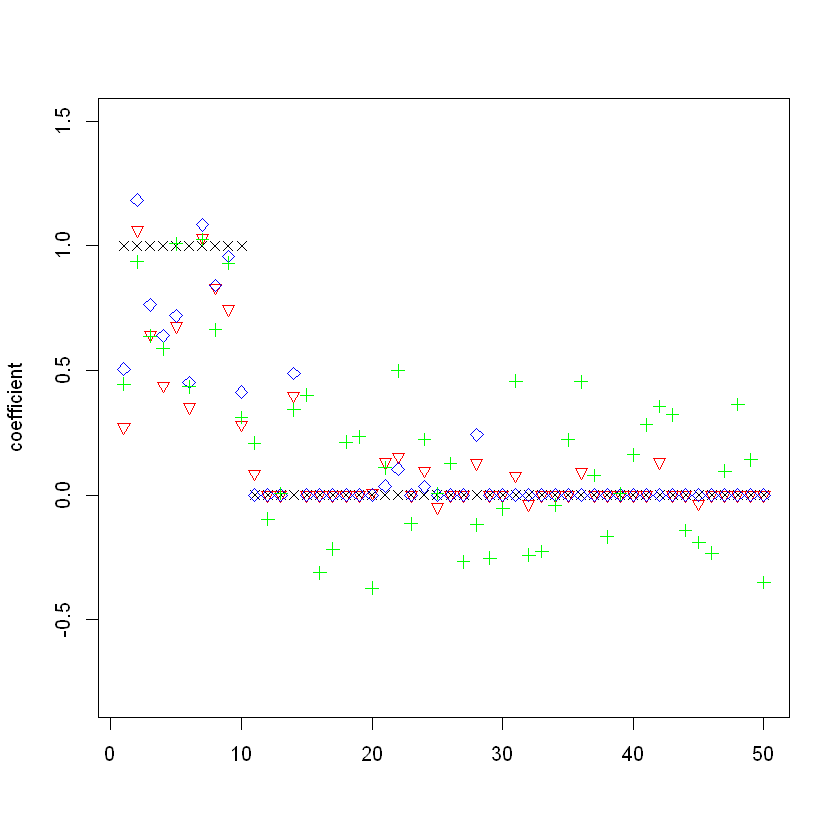

In [2]:
n <- 40
p <- 50
b0 <- c(rep(1, 10), rep(0, p - 10))
x <- matrix(rnorm(n * p), n, p)
y <- x %*% b0 + rnorm(n)

ols <- MASS::ginv(t(x) %*% x) %*% (t(x) %*% y) # OLS
# Implement Lasso by glmnet
cv_lasso <- glmnet::cv.glmnet(x, y)
lasso_result <- glmnet::glmnet(x, y, lambda = cv_lasso$lambda.min)

# Get weights
b_temp <- as.numeric(lasso_result$beta)
b_temp[b_temp == 0] <- 1e-8
w <- 1 / abs(b_temp) # Let gamma = 1

# Implement Adaptive Lasso by glmnet
cv_alasso <- glmnet::cv.glmnet(x, y, penalty.factor = w)
alasso_result <-
  glmnet::glmnet(x, y, penalty.factor = w, lambda = cv_alasso$lambda.min)

plot(b0, ylim = c(-0.8, 1.5), pch = 4, xlab = "", ylab = "coefficient")
points(lasso_result$beta, col = "red", pch = 6)
points(alasso_result$beta, col = "blue", pch = 5)
points(ols, col = "green", pch = 3)

# out of sample prediction
x_new <- matrix(rnorm(n * p), n, p)
y_new <- x_new %*% b0 + rnorm(n)
lasso_msfe <- (y_new - predict(lasso_result, newx = x_new)) %>% var()
alasso_msfe <- (y_new - predict(alasso_result, newx = x_new)) %>% var()
ols_msfe <- (y_new - x_new %*% ols) %>% var()

print(c(lasso_msfe, alasso_msfe, ols_msfe))


We can DIY Lasso by `CVXR`. 



In [3]:
library(CVXR)

lambda <- 2 * cv_lasso$lambda.min # tuning parameter

# CVXR for Lasso
beta_cvxr <- Variable(p)
obj <- sum_squares(y - x %*% beta_cvxr) / (2 * n) + lambda * p_norm(beta_cvxr, 1)
prob <- Problem(Minimize(obj))
lasso_cvxr <- solve(prob)
beta_cvxr_hat <- lasso_cvxr$getValue(beta_cvxr) %>% as.vector() %>% print()



Attaching package: 'CVXR'

The following object is masked from 'package:stats':

    power



ERROR: Error in lasso_cvxr$getValue(beta_cvxr) %>% as.vector() %>% print(): could not find function "%>%"


More methods are available if prediction of the response variables is the sole purpose of the regression.
An intuitive one is called *stagewise forward selection*.
We start from an empty model. Given many candidate $x_j$, in each round we add the regressor that can
produce the biggest $R^2$. This method is similar to the idea of $L_2$ componentwise boosting,
which does not adjust the coefficients fitted earlier.


## Shrinkage Estimation in Econometrics

* @su2016identifying: use shrinkage estimation for classification
* @shi2016estimation: convergence rate of GMM Lasso
* @lee2018: Lasso and adaptive Lasso in predictive regression
* @shi2019forward: forward selection
* @shi2020high: latent group in forecast combination

## Empirical Applications
* @lehrer2017box: movie box office
* @feng2019taming: factor zoo, compare machine learning methods
* @chinco2017sparse: financial market, Lasso prediction


## Reading

* Efron and Hastie: Ch. 16
* @athey2018impact



## Appendix

Suppose $y_i = x_i' \beta_0 + e_i$, where $e_i$ is independent of $x_i$ and $\mathrm{var}[e_i] = \sigma^2$. Then
$$
\min_{\beta} E[ (y_i - x_i' \beta)^2 ] = E[ (y_i - x_i' \beta_0)^2 ] = E[ e_i^2 ] = \sigma^2.
$$
This is the minimal error that can be achieved in the population.

In reality, we have a sample $(y_i, x_i)$ of $n$ observations, and we estimate $\beta$ by the OLS estimator $\hat{\beta} = (X'X)^{-1}X'y$.
The expectation of the SSR is
$$
E\left[ \frac{1}{n} \sum_{i=1}^n (y_i - x_i' \hat{\beta})^2  \right]
= \frac{1}{n}  E\left[ e'(I_n - X(X'X)^{-1}X )e  \right]=  \frac{\sigma^2}{n}(n-p) = \sigma^2\left( 1 - \frac{p}{n} \right)
< \sigma^2
$$
Asymptotically, if $p/n \to 0$, the two risks converge. Otherwise if $p/n \to c$, the expected SSR is strictly
smaller than the minimal population risk. The model is overfitted.


## References
